# Lab 2

## Objectives
- Perform intensity transformations for an image
- Perform histogram processing incl. equalization, matching, and adaptive equalization

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

## Question 1

Intensity transformation of grayscale images.

1a) Write a function (g, map) = intXform(f, mode, param) for transforming the intensities of an input 8-bit
grayscale image f. The intensities of f (and output image g) are assumed to be in the range (0,1). The type of
transformation performed is specified in parameter mode, a character string with values: ‘negative’, ‘log’,
or ‘gamma’. These specifications implement the intensity transformations given in the lecture slides, i.e.,
equations (1), (2), and (3) with c = 1.0, and γ in equation (3) is specified by the argument param. On the
output, g is the output image, and map is the transformation function computed by intXform. (Note the
need of conversion between dynamic ranges (0,L−1) and (0,1).)

In [2]:
def intXform(f, mode, param = 1.0):
    c = 1.0
    # Normalize input
    norm_input = minmax_scale(f)

    # Define the different transformations
    xform = lambda x : x
    if mode == 'negative':
        xform = lambda r : -r + 1.0
    if mode == 'log':    
        xform = lambda r : c * np.log(r + 1.0)
    if mode == 'gamma':
        xform = lambda r : c*r**param
    
    # Apply the transformation on each pixel
    g = np.array(list(map(xform, norm_input)))

    return minmax_scale(g), xform

1b) Read and display the image spillway-dark.tif. Apply a log transformation function to it. Display the result

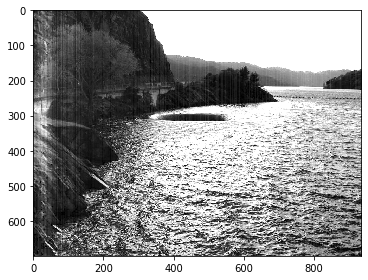

In [3]:
img = io.imread("spillway-dark.tif")
log_img , log_xform = intXform(img, 'log')
io.imshow(log_img)

1c) See if you can improve the result by using a gamma transformation. Display your result

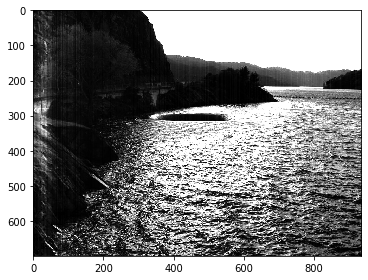

In [4]:
gamma_img, gamma_xform = intXform(img, 'gamma', 1.5)
io.imshow(gamma_img)

1d) Is there any improvement from using log transformation to using gamma transformation? Why (plot the
map to see the difference between the two transformation functions computed.)

In [5]:
# Not Implemented

## Question 2
Using built-in functions in Matlab or Python to perform contrast stretching for images pollen-lowcontrast.tif,
aerialview-washedout.tif, skeleton.tif, and spine.tif

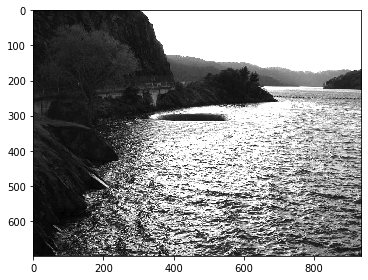

In [6]:
from skimage.exposure import rescale_intensity  

scaled_img = rescale_intensity(img)
io.imshow(scaled_img)

## Question 3
Image histograms

3a) Write a function h = imageHist(f, mode) for computing the histogram of a 256-level grayscale image, f,
whose intensities are nonnegative. If mode = ‘n’, the histogram should be normalized (default). Otherwise,
if mode = ‘u’, the histogram should be unnormalized.

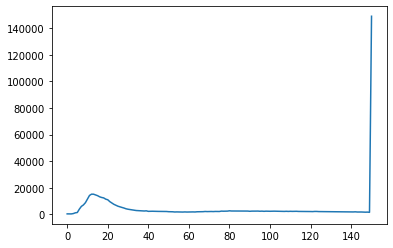

In [73]:
from skimage.exposure import rescale_intensity

img_hist, centres = exposure.histogram(img)
plt.plot(img_hist)
plt.show()